In [104]:
import sys ,os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5,style='whitegrid',context="paper")
from math import pi


In [187]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
    #   plt.legend()
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")

    #   plt.savefig(f"../figures/{title}.svg",format="svg")

In [122]:
df_metrics_unbalanced =pd.read_csv('../data/dataframe_metrics_shakel_unbalanced.csv')
df_metrics_unbalanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

df_metrics_balanced =pd.read_csv('../data/dataframe_metrics_shakel_balanced.csv')
df_metrics_balanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']


In [123]:
df_CV_10k = pd.read_csv("../data/dataframe_metrics_shakel_metrics_crossvalidation.csv")
df_CV_10k = df_CV_10k[['BM5 bal  ',' 10kCV Bal ',' BM5 unb ','10kCV Unb ']]
df_CV_10k.columns = ['Bal  BM4/5-up','Bal 10CV','3K BM4/5-up','3K-10CV']
df_CV_10k["Metrics"] = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
df_CV_10k = df_CV_10k.set_index("Metrics")

In [124]:
df_metrics_unbalanced

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
PRC,0.868326,0.872566,0.795650,0.986521,0.267004,0.926051,0.399832,0.411593
SVM,0.708476,0.707225,0.729924,0.978206,0.126983,0.820932,0.216331,0.214437


In [125]:
df_CV_10k

,Bal BM4/5-up,Bal 10CV,3K BM4/5-up,3K-10CV
Metrics,,,,
Acc,0.8320,0.9446,0.9677,0.9619
R_inc,0.8668,0.9645,0.9683,0.9633
R_corr,0.7972,0.9248,0.9554,0.9387
P_inc,0.8104,0.9288,0.9973,0.9963
P_corr,0.8569,0.9627,0.6380,0.6006
F1_inc,0.8377,0.9461,0.9826,0.9795
F1_corr,0.8260,0.9430,0.7651,0.7319
MCC,0.6658,0.8904,0.7661,0.7335


b RF 
gold PRC 
g SVM 


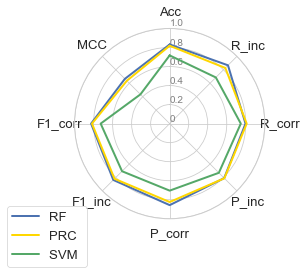

In [126]:
plot_radar(df_metrics_balanced,"Radar_plot_metrics_balanced",['b','gold','g'],['solid','solid','solid'])

Navy RF 
goldenrod PRC 
darkgreen SVM 


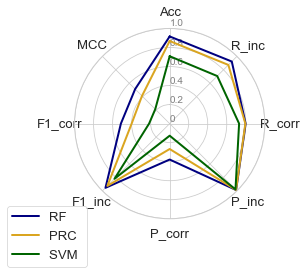

In [127]:
plot_radar(df_metrics_unbalanced,"Radar_plot_metrics_unbalanced",['Navy','goldenrod','darkgreen'],['solid','solid','solid'])

b Bal  BM4/5-up
indianred Bal 10CV
Navy 3K BM4/5-up
darkorange 3K-10CV


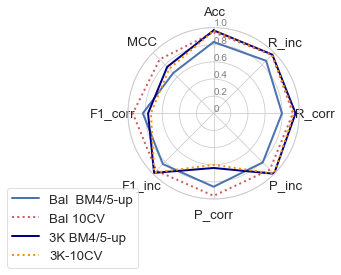

In [128]:
plot_radar(df_CV_10k.T,"CV_performance",['b','indianred','Navy','darkorange'],['solid','dotted','solid','dotted'])

In [180]:
df_hard = pd.read_csv("../data/dataframe_metrics_hard_performance.csv")
df_hard.set_index("Metrics",inplace=True)

In [181]:
df_hard = df_hard.T 

In [182]:
df_hard.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

In [190]:
df_fig_10 = pd.read_csv("../data/dataframe_metrics_CODES_performance_final.csv")

In [191]:
df_fig_10.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set


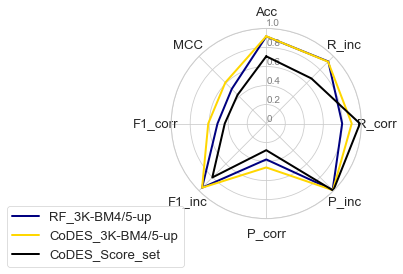

In [192]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

silver Bal
cyan BM4/5-up


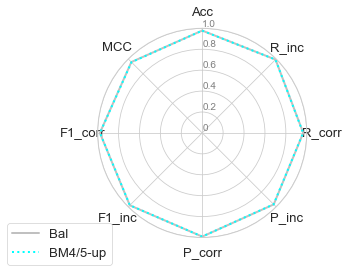

In [193]:
plot_radar(df_hard,"hard_set",['silver','cyan'],['solid','dotted'])

In [183]:
df_hard

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Bal,0.9791,0.9919,0.9663,0.9672,0.9917,0.9794,0.9788,0.9586
BM4/5-up,0.9783,0.9916,0.9650,0.9660,0.9914,0.9786,0.9780,0.9570


In [175]:
df_hard.T.columns

Index(['Accuracy', 'Recall_inc', 'Recall_cor', 'Precision_inc',
       'Precision_cor', 'F1_inc', 'F1_cor', 'MCC'],
      dtype='object', name='Metrics')